In [1]:
import warnings
warnings.filterwarnings('ignore') #파이썬 Warning 무시

import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR) #텐서플로우 Warning은 무시하고 Error만 출력

import sys
print("Python 버전:", sys.version)

import pandas as pd
print("pandas 버전:", pd.__version__)

import matplotlib
print("matplotlib 버전:", matplotlib.__version__)

import numpy as np
print("NumPy 버전:", np.__version__)

import scipy as sp
print("SciPy 버전:", sp.__version__)

import IPython
print("IPython 버전:", IPython.__version__)

import sklearn
print("scikit-learn 버전:", sklearn.__version__)

import seaborn as sns

import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

import mglearn

import platform
if platform.system() == 'Windows':
    matplotlib.rc('font', family='Malgun Gothic')
elif platform.system() == 'Darwin':
    matplotlib.rc('font', family='AppleGothic')
else:
    matplotlib.rc('font', family='NanumGothic')

Python 버전: 3.7.6 (default, Jan  8 2020, 20:23:39) [MSC v.1916 64 bit (AMD64)]
pandas 버전: 1.0.1
matplotlib 버전: 3.1.3
NumPy 버전: 1.18.1
SciPy 버전: 1.4.1
IPython 버전: 7.12.0
scikit-learn 버전: 0.22.1


Using TensorFlow backend.


In [2]:
#KMeans vs AgglomerativeClustering vs DBSCAN

In [3]:
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

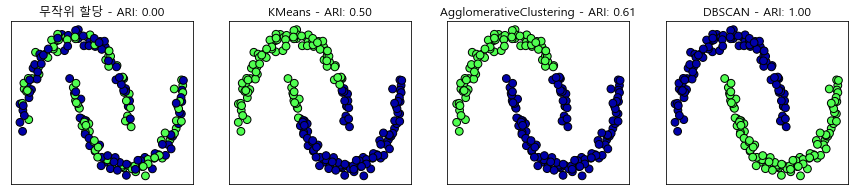

In [4]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
fig, axes = plt.subplots(1, 4, figsize=(15, 3), subplot_kw={"xticks":(), "yticks":()})
algorithms = [KMeans(n_clusters=2), AgglomerativeClustering(n_clusters=2), DBSCAN()]

random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low=0, high=2, size=len(X))

axes[0].set_title("무작위 할당 - ARI: {:.2f}".format(adjusted_rand_score(y, random_clusters)))
axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=random_clusters, cmap=mglearn.cm3, s=60, edgecolors='black')

for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm3, s=60, edgecolors='black')
    ax.set_title("{} - ARI: {:.2f}".format(algorithm.__class__.__name__, adjusted_rand_score(y, clusters)))
    
plt.show()

In [5]:
# 데이터 표현과 특성 공학

In [6]:
# 글자를 숫자로 바꾸는 것이 중요, one-hot encoding 사용
# 문자를 숫자로 변경해주는 작업
# 해당 클래스가 배열의 어떤 위치를 차지하고 있는 지 나타냄.

In [7]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
         'marital-status', 'occupation', 'relationship', 'race', 'gender', 
         'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
         'income']
data = pd.read_csv('datasets/adult.data', header=None, index_col=False, names=names)
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [8]:
data.gender.value_counts()

 Male      21790
 Female    10771
Name: gender, dtype: int64

In [9]:
print("원본 특성: \n", list( data.columns ), "\n")
data_dummies = pd.get_dummies(data)
print("get_dummies 후의 특성: \n", list(data_dummies.columns))

원본 특성: 
 ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income'] 

get_dummies 후의 특성: 
 ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-sp

In [10]:
data_dummies.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,income_ <=50K,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [11]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
X = features.values

In [12]:
y = data_dummies['income_ >50K'].values

In [13]:
X.shape, y.shape

((32561, 53), (32561,))

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("test acc: {:.2f}".format(logreg.score(X_test, y_test)))

test acc: 0.80


In [16]:
# pandas에선 get_dummies 함수를 쓴다.
# scikit-learn 에서 범주형 데이터 다루기 : OneHotEncoder, ColumnTransforrmer

In [17]:
demo_df = pd.DataFrame({"num feature":[0, 1, 2, 1], "categorical feature":
                        ["socks", "fox", "socks", "box"]})
demo_df

,num feature,categorical feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [18]:
pd.get_dummies(demo_df)

,num feature,categorical feature_box,categorical feature_fox,categorical feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder(sparse=False)
print(ohe.fit_transform(demo_df))

[[1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0.]]


In [21]:
"""
num feature    categorical feature
1 0 0          0 0 1 ..... socks
0 1 0          0 1 0 ..... fox
0 0 1          0 0 1 ..... socks
0 1 0          1 0 0 ..... box
"""

'\nnum feature    categorical feature\n1 0 0          0 0 1 ..... socks\n0 1 0          0 1 0 ..... fox\n0 0 1          0 0 1 ..... socks\n0 1 0          1 0 0 ..... box\n'

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [23]:
ct = ColumnTransformer(
    [("scaling", StandardScaler(), ['age', 'hours-per-week']), 
     ("onehot", OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation'])])

In [24]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

data_features = data.drop("income", axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    data_features, data.income, random_state=0)

ct.fit(X_train)
X_train_trans = ct.transform(X_train)
print(X_train_trans.shape)

(24420, 44)


In [26]:
from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (StandardScaler(), ['age', 'hours-per-week']), 
    (OneHotEncoder(sparse=False), ['workclass', 'education', 'gender', 'occupation']))

In [27]:
X, y = mglearn.datasets.make_wave(n_samples=120)

In [28]:
from sklearn.svm import SVR

In [32]:
import numpy as np
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

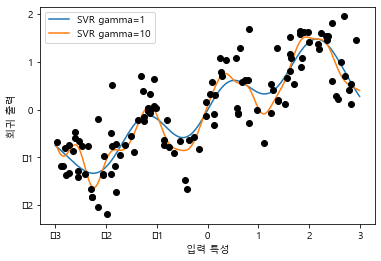

In [37]:
from sklearn.svm import SVR

for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))


plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("회귀 출력")
plt.xlabel("입력 특성")
plt.legend(loc="best")
plt.show()

In [38]:
# 모델 평가와 성능 향상 (교차 검증)

In [39]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X, y = make_blobs(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

logreg = LogisticRegression().fit(X_train, y_train)

print("test acc: {:.2f}".format(logreg.score(X_test, y_test)))

test acc: 0.88


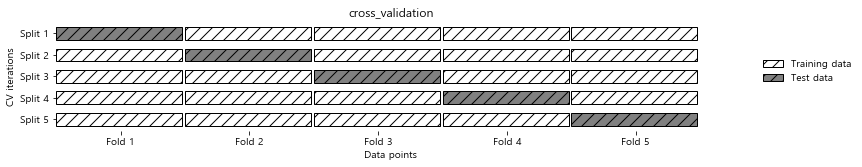

In [40]:
mglearn.plots.plot_cross_validation()

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression()
scores = cross_val_score(logreg, iris.data, iris.target)

print("교차 검증 점수:", scores)

교차 검증 점수: [0.96666667 1.         0.93333333 0.96666667 1.        ]


In [43]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=7)
print("교차 검증 점수: ", scores)

교차 검증 점수:  [0.95454545 1.         0.90909091 0.95238095 0.95238095 1.
 1.        ]


In [44]:
print("교차 검증 평균: ", scores.mean())

교차 검증 평균:  0.9669140383426098


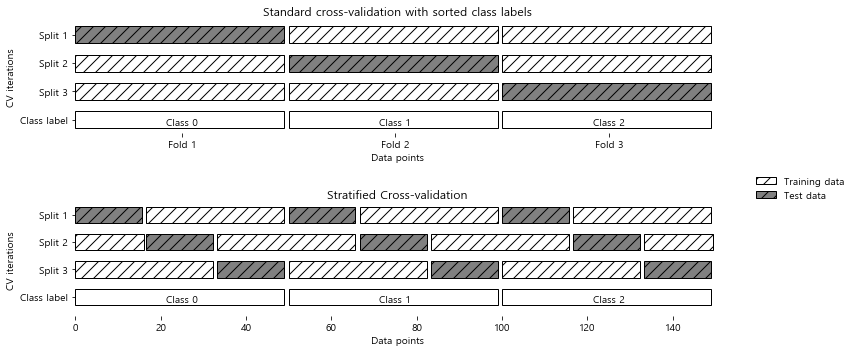

In [45]:
mglearn.plots.plot_stratified_cross_validation()

In [46]:
from sklearn.model_selection import KFold

In [47]:
kfold = KFold(n_splits=5)

In [52]:
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([1.        , 1.        , 0.86666667, 0.93333333, 0.83333333])

In [54]:
kfold = KFold(n_splits=3)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)
#학습이 안 됨

array([0., 0., 0.])

In [55]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
cross_val_score(logreg, iris.data, iris.target, cv=kfold)

array([0.98, 0.96, 0.96])

In [56]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("교차 검증 분할 횟수:", len(scores))
print("평균 정확도: {:.2f}".format(scores.mean()))

교차 검증 분할 횟수: 150
평균 정확도: 0.97


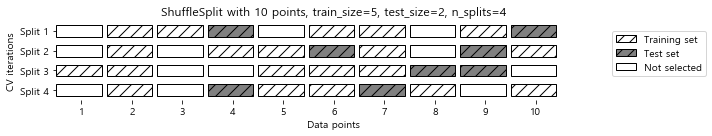

In [57]:
mglearn.plots.plot_shuffle_split()

In [59]:
from sklearn.svm import SVC
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
print(X_train.shape, X_test.shape)
best_score = 0
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svc = SVC(gamma=gamma, C=C)
        svc.fit(X_train, y_train)
        score = svc.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {"C":C, "gamma":gamma}
print("best score: {:.2f}".format(best_score))

(112, 4) (38, 4)
best score: 0.97


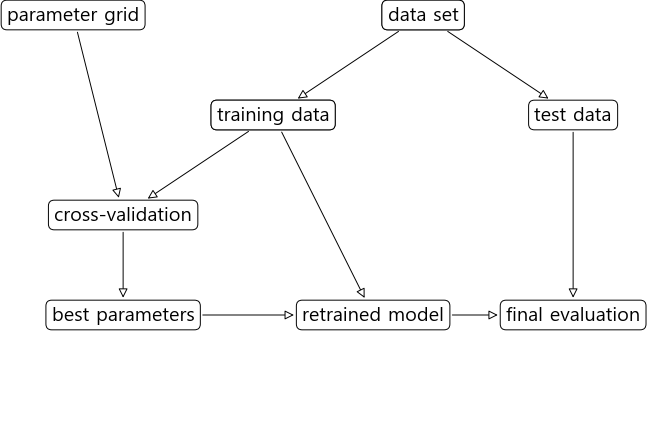

In [61]:
mglearn.plots.plot_grid_search_overview()

In [62]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [64]:
print("test acc: {:.2f}".format(grid_search.score(X_test, y_test)))

test acc: 0.97


In [65]:
from sklearn.svm import SVC
# 데이터를 훈련+검증 세트 그리고 테스트 세트로 분할
X_trainval, X_test, y_trainval, y_test = train_test_split(
    iris.data, iris.target, random_state=0)
# 훈련+검증 세트를 훈련 세트와 검증 세트로 분할
X_train, X_valid, y_train, y_valid = train_test_split(
    X_trainval, y_trainval, random_state=1)
print("훈련 세트의 크기: {}   검증 세트의 크기: {}   테스트 세트의 크기:"
      " {}\n".format(X_train.shape[0], X_valid.shape[0], X_test.shape[0]))

best_score = 0

훈련 세트의 크기: 84   검증 세트의 크기: 28   테스트 세트의 크기: 38



In [66]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        # 매개변수의 각 조합에 대해 SVC를 훈련시킵니다
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # 검증 세트로 SVC를 평가합니다
        score = svm.score(X_valid, y_valid)
        # 점수가 더 높으면 매개변수와 함께 기록합니다
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

# 훈련 세트와 검증 세트를 합쳐 모델을 다시 만든 후
# 테스트 세트를 사용해 평가합니다
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("검증 세트에서 최고 점수: {:.2f}".format(best_score))
print("최적 파라미터: ", best_parameters)
print("최적 파라미터에서 테스트 세트 점수: {:.2f}".format(test_score))

검증 세트에서 최고 점수: 0.96
최적 파라미터:  {'C': 10, 'gamma': 0.001}
최적 파라미터에서 테스트 세트 점수: 0.92


In [68]:
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        
        if score > best_score:
            best_score = score
            best_parameters = {'C':C, 'gamma':gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)

print("test acc: {:.2f}".format(svm.score(X_test, y_test)*100))

test acc: 97.37


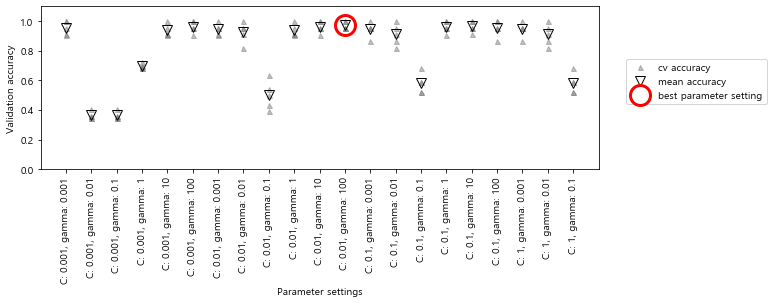

In [69]:
mglearn.plots.plot_cross_val_selection()

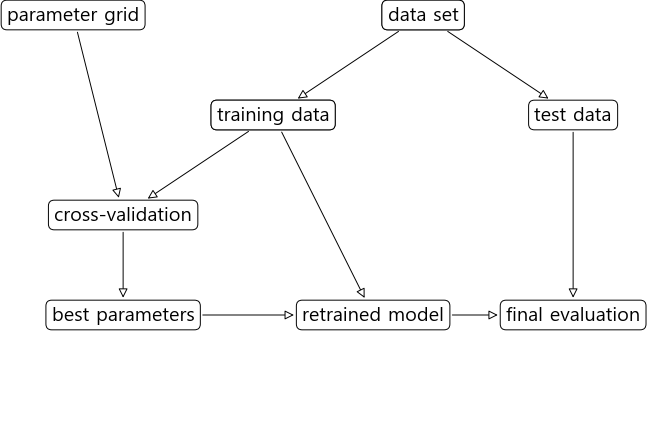

In [71]:
mglearn.plots.plot_grid_search_overview()

In [80]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100], 
              "gamma": [0.001, 0.01, 0.1, 1, 10, 100]}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target,
                                                    random_state=0)

grid_search.fit(X_train, y_train)

print("test acc: {:.2f}".format(grid_search.score(X_test,y_test)*100))
print("best parameters:", grid_search.best_params_)
print("최고의 교차 검증 점수: {:.2f}".format(grid_search.best_score_*100))


test acc: 97.37
best parameters: {'C': 10, 'gamma': 0.1}
최고의 교차 검증 점수: 97.31


In [82]:
result = pd.DataFrame(grid_search.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000593,0.000485,0.000199,0.000399,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
1,0.000404,0.000494,0.000200,0.000399,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
2,0.000598,0.000489,0.000199,0.000399,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
3,0.000399,0.000489,0.000200,0.000399,0.001,1,"{'C': 0.001, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
4,0.000597,0.000488,0.000206,0.000412,0.001,10,"{'C': 0.001, 'gamma': 10}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
5,0.000405,0.000496,0.000593,0.000485,0.001,100,"{'C': 0.001, 'gamma': 100}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
6,0.000400,0.000490,0.000399,0.000488,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
7,0.000397,0.000486,0.000200,0.000401,0.01,0.01,"{'C': 0.01, 'gamma': 0.01}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
8,0.000399,0.000489,0.000199,0.000399,0.01,0.1,"{'C': 0.01, 'gamma': 0.1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581
9,0.000593,0.000484,0.000199,0.000399,0.01,1,"{'C': 0.01, 'gamma': 1}",0.347826,0.347826,0.363636,...,0.366403,0.022485,22,0.370787,0.370787,0.366667,0.366667,0.355556,0.366092,0.005581


In [84]:
pd.set_option('display.max_columns', None)
results = pd.DataFrame(grid_search.cv_results_)
display(np.transpose(results.head()))

,0,1,2,3,4
mean_fit_time,0.000593424,0.00040369,0.000598335,0.000398874,0.000597191
std_fit_time,0.000484658,0.000494482,0.000488539,0.000488519,0.000487606
mean_score_time,0.000199318,0.000199652,0.000199461,0.000199556,0.000206137
std_score_time,0.000398636,0.000399303,0.000398922,0.000399113,0.000412273
param_C,0.001,0.001,0.001,0.001,0.001
param_gamma,0.001,0.01,0.1,1,10
params,"{'C': 0.001, 'gamma': 0.001}","{'C': 0.001, 'gamma': 0.01}","{'C': 0.001, 'gamma': 0.1}","{'C': 0.001, 'gamma': 1}","{'C': 0.001, 'gamma': 10}"
split0_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826
split2_test_score,0.363636,0.363636,0.363636,0.363636,0.363636


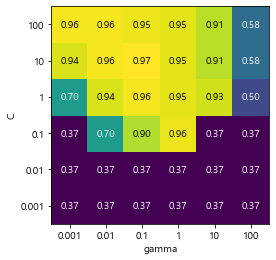

In [86]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], 
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis')

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor